In [177]:
import pandas as pd;
import matplotlib.pyplot as plt
import seaborn as sns;
import numpy as np
import matplotlib.ticker as ticker
import csv
from wordcloud import WordCloud

/var/folders/cf/4q4n090n14z__j87kczy_w880000gr/T/ipykernel_83017/3908467453.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(file.corr(),annot=True,cmap='RdYlGn')


<AxesSubplot: >

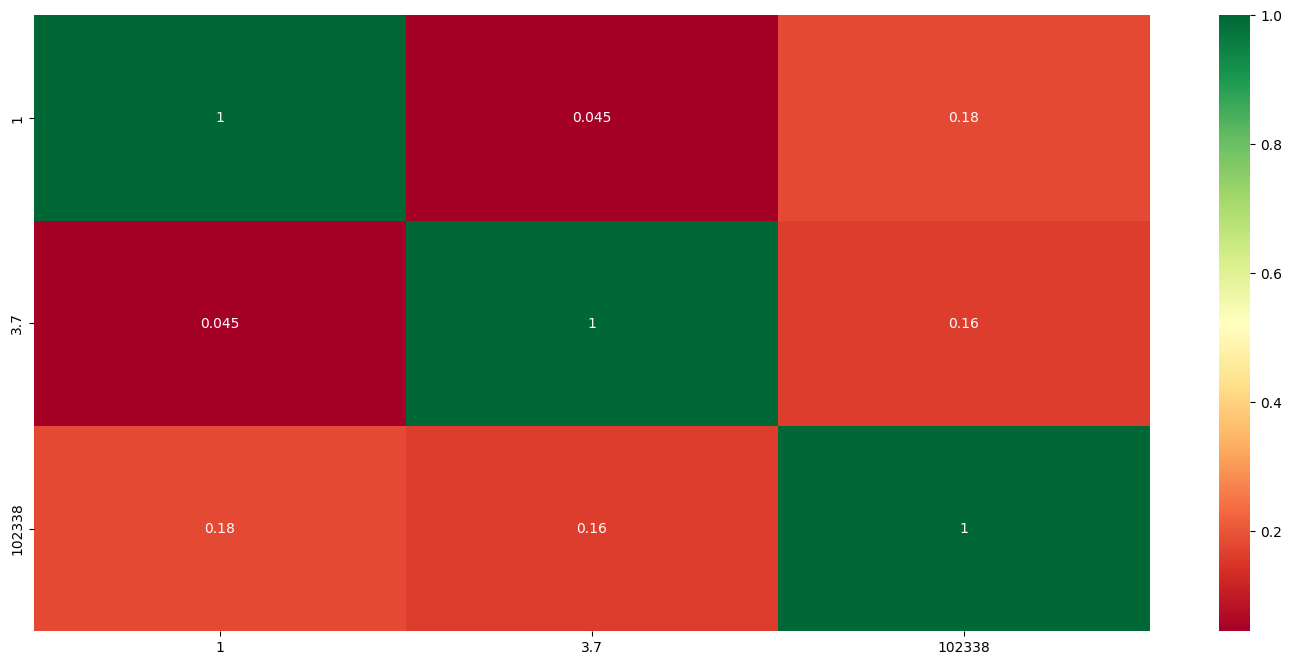

In [3]:
with open("data/movies.csv", "r") as movies:
    file = pd.read_csv(movies)

# plt.figure(figsize=(18,8))
# sns.heatmap(file.corr(),annot=True,cmap='RdYlGn')

In [148]:

numpyarray = file.to_numpy()
print(len(numpyarray[np.where(numpyarray[:,2] < '1940-01-01')]))
movies1927 = numpyarray[np.where(numpyarray[:,2] < '1927-01-01')]
movies1937 = numpyarray[np.where((numpyarray[:,2] < '1937-01-01' ) & (numpyarray[:,2] >= '1927-01-01'))]
movies1947 = numpyarray[np.where((numpyarray[:,2] < '1947-01-01') & (numpyarray[:,2] >= '1937-01-01'))]
movies1957 = numpyarray[np.where((numpyarray[:,2] < '1957-01-01') & (numpyarray[:,2] >= '1947-01-01'))]
movies1967 = numpyarray[np.where((numpyarray[:,2] < '1967-01-01') & (numpyarray[:,2] >= '1957-01-01'))]
movies1977 = numpyarray[np.where((numpyarray[:,2] < '1977-01-01') & (numpyarray[:,2] >= '1967-01-01'))]
movies1987 = numpyarray[np.where((numpyarray[:,2] < '1987-01-01') & (numpyarray[:,2] >= '1977-01-01'))]
movies1997 = numpyarray[np.where((numpyarray[:,2] < '1997-01-01') & (numpyarray[:,2] >= '1987-01-01'))]

movies2007 = numpyarray[np.where((numpyarray[:,2] < '2007-01-01') & (numpyarray[:,2] >= '1997-01-01'))]
movies2017 = numpyarray[np.where((numpyarray[:,2] >= '2007-01-01'))]

263


In [149]:
dates_array = np.array(["<1927", "1927-1937","1937-1947","1947-1957","1957-1967",
                        "1967-1977","1977-1987","1987-1997","1997-2007", ">2007"])
print(dates_array)

movies1927Cleaned = movies1927[np.where(movies1927[:,3] > 0.0)]
movies1927Average = movies1927Cleaned[:,3].mean()
print(movies1927Average)


movies1937Cleaned = movies1937[np.where(movies1937[:,3] > 0.0)]
movies1937Average = movies1937Cleaned[:,3].mean()

movies1947Cleaned = movies1947[np.where(movies1947[:,3] > 0.0)]
movies1947Average = movies1947Cleaned[:,3].mean()
movies1957Cleaned = movies1957[np.where(movies1957[:,3] > 0.0)]
movies1957Average = movies1957Cleaned[:,3].mean()

movies1967Cleaned = movies1967[np.where(movies1967[:,3] > 0.0)]
movies1967Average = movies1967Cleaned[:,3].mean()
movies1977Cleaned = movies1977[np.where(movies1977[:,3] > 0.0)]
movies1977Average = movies1977Cleaned[:,3].mean()
movies1987Cleaned = movies1987[np.where(movies1987[:,3] > 0.0)]
movies1987Average = movies1987Cleaned[:,3].mean()
movies1997Cleaned = movies1997[np.where(movies1997[:,3] > 0.0)]
movies1997Average = movies1997Cleaned[:,3].mean()
movies2007Cleaned = movies2007[np.where(movies2007[:,3] > 0.0)]
movies2007Average = movies2007Cleaned[:,3].mean()
movies2017Cleaned = movies2017[np.where(movies2017[:,3] > 0.0)]
movies2017Average = movies2017Cleaned[:,3].mean()

allMoviesAverage = np.array([movies1927Average,movies1937Average,
                             movies1947Average,movies1957Average,
                             movies1967Average,movies1977Average,
                             movies1977Average,
                             movies1987Average,movies1997Average,
                             movies2017Average,movies2007Average]).mean()
groupedMoviesAverage = np.array([movies1927Average,movies1937Average,
                             movies1947Average,movies1957Average,
                             movies1967Average,movies1977Average,
                             movies1987Average,movies1997Average,
                             movies2007Average,movies2017Average])


allMoviesLength = len(numpyarray)


groupedMoviesLength = np.array([len(movies1927Cleaned),len(movies1937Cleaned),
                             len(movies1947Cleaned),len(movies1957Cleaned),
                             len(movies1967Cleaned),len(movies1977Cleaned),
                             len(movies1987Cleaned),len(movies1997Cleaned),
                             len(movies2007Cleaned),len(movies2017Cleaned)])

['<1927' '1927-1937' '1937-1947' '1947-1957' '1957-1967' '1967-1977'
 '1977-1987' '1987-1997' '1997-2007' '>2007']
3.9050000000000002


In [150]:
print(movies1927Cleaned[:,4].sum())
groupedMoviesNumRatings = np.array([movies1927Cleaned[:,4].sum(),movies1937Cleaned[:,4].sum(),
                             movies1947Cleaned[:,4].sum(),movies1957Cleaned[:,4].sum(),
                             movies1967Cleaned[:,4].sum(),movies1977Cleaned[:,4].sum(),
                             movies1987Cleaned[:,4].sum(),movies1997Cleaned[:,4].sum(),
                             movies2007Cleaned[:,4].sum(),movies2017Cleaned[:,4].sum()])

55575.0


3.6225430702243684
[5.5575000e+04 2.3234500e+05 6.5768600e+05 9.4482100e+05 1.5462770e+06
 2.8016010e+06 5.9083710e+06 1.5993357e+07 6.8070968e+07 6.0981743e+07]


Text(0.5, 0, '# of ratings')

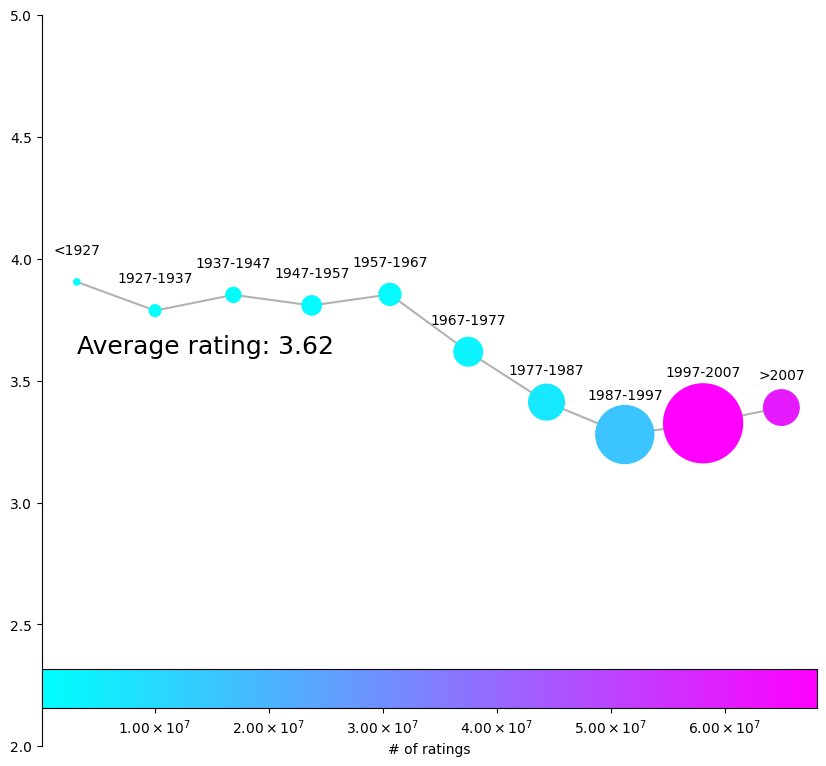

In [225]:

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
for side in ['top','right','bottom']:
    ax.spines[side].set_visible(False)
plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)

movieScatter = plt.scatter(dates_array,groupedMoviesAverage,s=groupedMoviesLength, c=groupedMoviesNumRatings,cmap="cool", zorder=2)
plt.plot(dates_array, groupedMoviesAverage, color = "black", zorder=1,alpha=0.3)
plt.ylim([2,5])

frame = plt.gca();

def fmt(x, pos):
    a, b = '{:.2e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)

movieBar= plt.colorbar(movieScatter, location = "bottom", pad = -0.1,format=ticker.FuncFormatter(fmt))


distanceArray = [20,20,20,20,20,20,20,25,34,20]

for date, groupedMovieAverage, dis in zip(dates_array,groupedMoviesAverage, distanceArray):

    label = date

    plt.annotate(label, # this is the text
                 (date,groupedMovieAverage), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,dis), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    
print(allMoviesAverage)    
plt.text(0, 3.613732, 'Average rating: ' + str(round(allMoviesAverage,2)), fontsize = 18)
print(groupedMoviesNumRatings)

movieBar.ax.set_xlabel('# of ratings')



# plt.imshow(wordcloud);

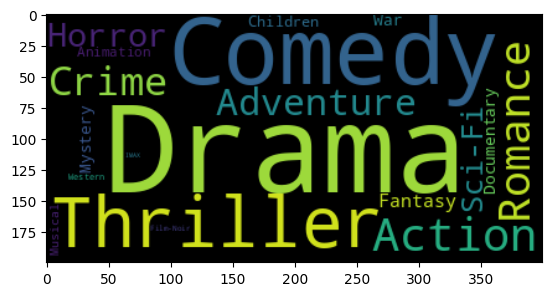

In [211]:
reader = csv.reader(open('data/Tags_1927.csv', 'r',newline='\n'))
d = {}

for k,v in reader:
    d[v] = float(k)

 # Generate a word cloud image
wordcloud1927 = WordCloud().generate_from_frequencies(d) 
plt.imshow(wordcloud1927, interpolation="bilinear");
    
    
reader = csv.reader(open('data/Tags_1937.csv', 'r',newline='\n'))
d = {}

for k,v in reader:
    d[v] = float(k)

 # Generate a word cloud image
wordcloud1937 = WordCloud().generate_from_frequencies(d) 
plt.imshow(wordcloud1937, interpolation="bilinear");

reader = csv.reader(open('data/Tags_1947.csv', 'r',newline='\n'))
d = {}

for k,v in reader:
    d[v] = float(k)

 # Generate a word cloud image
wordcloud1947 = WordCloud().generate_from_frequencies(d) 
plt.imshow(wordcloud1947, interpolation="bilinear");

reader = csv.reader(open('data/Tags_1957.csv', 'r',newline='\n'))
d = {}

for k,v in reader:
    d[v] = float(k)

 # Generate a word cloud image
wordcloud1957 = WordCloud().generate_from_frequencies(d) 
plt.imshow(wordcloud1957, interpolation="bilinear");

reader = csv.reader(open('data/Tags_1967.csv', 'r',newline='\n'))
d = {}

for k,v in reader:
    d[v] = float(k)

 # Generate a word cloud image
wordcloud1967 = WordCloud().generate_from_frequencies(d) 
plt.imshow(wordcloud1967, interpolation="bilinear");

reader = csv.reader(open('data/Tags_1977.csv', 'r',newline='\n'))
d = {}

for k,v in reader:
    d[v] = float(k)

 # Generate a word cloud image
wordcloud1977 = WordCloud().generate_from_frequencies(d) 
plt.imshow(wordcloud1977, interpolation="bilinear");

reader = csv.reader(open('data/Tags_1987.csv', 'r',newline='\n'))
d = {}

for k,v in reader:
    d[v] = float(k)

 # Generate a word cloud image
wordcloud1987 = WordCloud().generate_from_frequencies(d) 
plt.imshow(wordcloud1987, interpolation="bilinear");

reader = csv.reader(open('data/Tags_1997.csv', 'r',newline='\n'))
d = {}

for k,v in reader:
    d[v] = float(k)

 # Generate a word cloud image
wordcloud1997 = WordCloud().generate_from_frequencies(d) 
plt.imshow(wordcloud1997, interpolation="bilinear");

reader = csv.reader(open('data/Tags_2007.csv', 'r',newline='\n'))
d = {}

for k,v in reader:
    d[v] = float(k)

 # Generate a word cloud image
wordcloud2007 = WordCloud().generate_from_frequencies(d) 
plt.imshow(wordcloud2007, interpolation="bilinear");

reader = csv.reader(open('data/Tags_2017.csv', 'r',newline='\n'))
d = {}

for k,v in reader:
    d[v] = float(k)

 # Generate a word cloud image
wordcloud2017 = WordCloud().generate_from_frequencies(d) 
plt.imshow(wordcloud2017, interpolation="bilinear");